# PSO for transport routing problem

In [130]:
#подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import math
import networkx as nx

## Линейный коэффициент инерции

In [131]:
def wLin1(tmax, t, wmin, wmax):
    w = (tmax - t)/tmax * (wmax - wmin) + wmin
    return w

## Исходные данные

In [132]:
iterAmount = 3000
nodesAmount = 10
particlesAmount = 50
pMin = 0
pMax = 1
c1 = 0.1
c2 = 0.1

#генерируем граф со случайными расстояниями
testGraph = np.random.uniform(1, 100, size=(nodesAmount,nodesAmount))
for i in range(nodesAmount):
    for j in range(nodesAmount):
         if i == j:
            testGraph[i, j] = 0
                
#представляем частицы в виде матрицы с элементами на интервале [0;1]
particlesPosition = np.random.uniform(pMin, pMax, size=(particlesAmount,nodesAmount,nodesAmount))
for k in range(particlesAmount):
    for i in range(nodesAmount):
        for j in range(nodesAmount):
            if i == j:
                particlesPosition[k, i, j] = -0.1
                
#перевод позиции частиц в матрицу смежности
particlesAdjencyMatrix = np.zeros((particlesAmount,nodesAmount,nodesAmount))

for k in range(particlesAmount):
    nodesToVisit = np.array(range(1,nodesAmount))
    shortestPath = np.array(range(1))
    for z in range(len(nodesToVisit)):
        newNode = -0.1
        for i in range(len(nodesToVisit)):
            if particlesPosition[k, shortestPath[-1], nodesToVisit[i]] > newNode:
                newNode = particlesPosition[k, shortestPath[-1], nodesToVisit[i]]
                newNodePosition = nodesToVisit[i]
                index = i
                
    
        shortestPath = np.append(shortestPath, newNodePosition)
        particlesAdjencyMatrix[k, shortestPath[-2], shortestPath[-1]] = 1
        nodesToVisit = np.delete(nodesToVisit,index)
        
    shortestPath = np.append(shortestPath, 0)
    particlesAdjencyMatrix[k, shortestPath[-2], shortestPath[-1]] = 1

#скорость частиц
particlesVelocity = np.zeros((particlesAmount,nodesAmount,nodesAmount))

#нахождение значения целевой функции для каждой частицы
particlesValue = np.empty(0)
for k in range(particlesAmount):
    particlesValue0 = sum(sum(np.multiply(testGraph,particlesAdjencyMatrix[k])))
    particlesValue = np.append(particlesValue, particlesValue0)


bestValue = min(particlesValue)
bestPosition = particlesPosition[np.where(particlesValue == bestValue)[0]][0]
bestParticlesValue = particlesValue 
bestParticlesPosition = particlesPosition

bestValueVector = np.empty(0)
bestPositionVector = np.empty(0)
bestParticlesValueVector = np.empty(0)
bestParticlesPositionVector = np.empty(0)
particlesPositionVector = np.empty(0)

## Матрица расстояний графа

In [133]:
pd.DataFrame(testGraph)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,13.291544,95.469657,48.224331,16.063337,98.977524,97.301048,27.966938,9.838498,24.352262
1,20.261022,0.000000,10.990254,79.994915,84.931061,8.398381,29.325234,71.167331,14.650896,37.504368
2,67.902847,89.584112,0.000000,6.344866,33.216961,90.145269,89.318940,94.631900,49.167783,53.502056
3,39.654378,69.236824,6.354913,0.000000,24.331045,30.667315,73.746698,24.907703,56.792499,70.460582
4,53.215684,87.818784,36.862425,44.348917,0.000000,8.352482,89.416435,8.615497,88.106407,29.405248
5,84.603794,75.173129,39.001155,19.419304,34.251326,0.000000,39.422851,2.210188,98.773712,56.456043
6,28.375284,84.398027,83.637624,83.138252,10.023665,33.705781,0.000000,86.489523,11.764938,73.539863
7,67.796458,69.199165,42.844429,74.360194,55.603533,39.544330,39.635769,0.000000,81.968220,65.305951
8,93.734651,75.836283,94.079357,43.571361,59.912342,91.604857,34.837586,56.412560,0.000000,22.561295
9,80.441649,76.676313,52.613978,48.268201,49.055135,12.704548,51.807719,36.260149,24.241727,0.000000


## PSO for disctere problem method 1

In [134]:
for z in range(iterAmount):
    
    #случайное изменение положения частиц                    
    if z % 50 == 0:
        for k in range(particlesAmount): 
            r1 = random.random()
            if r1 > 0.5:
                for i in range(nodesAmount):
                    for j in range(nodesAmount):
                        if i!=j:
                            particlesPosition[k,i,j] = particlesPosition[k,i,j] + random.uniform(-0.3, 0.3)
                            
    #пересчет скорости и позиции частиц
    for k in range(particlesAmount):
        for i in range(nodesAmount):
            for j in range(nodesAmount):
                prv = wLin1(iterAmount, z, 1, 0.3) * particlesVelocity[k,i,j]
                cog = c1 * random.random() * (bestParticlesPosition[k,i,j] - particlesPosition[k,i,j])
                soc = c2 * random.random() * (bestPosition[i,j] - particlesPosition[k,i,j])
                              
                particlesVelocity[k,i,j] = prv + cog + soc
                
                dist = particlesPosition[k,i,j] + particlesVelocity[k,i,j]
            
                if dist < pMin:
                    particlesPosition[k,i,j] = pMin
                elif dist > pMax:
                    particlesPosition[k,i,j] = pMax
                else:
                    particlesPosition[k,i,j] = dist
                    
                
    #пересчет матрицы смежности для каждой частицы  

    particlesAdjencyMatrix = np.zeros((particlesAmount,nodesAmount,nodesAmount))

    for k in range(particlesAmount):
        nodesToVisit = np.array(range(1,nodesAmount))
        shortestPath = np.array(range(1))
        for z in range(len(nodesToVisit)):
            newNode = -0.1
            for i in range(len(nodesToVisit)):
                if particlesPosition[k, shortestPath[-1], nodesToVisit[i]] > newNode:
                    newNode = particlesPosition[k, shortestPath[-1], nodesToVisit[i]]
                    newNodePosition = nodesToVisit[i]
                    index = i          
    
            shortestPath = np.append(shortestPath, newNodePosition)
            particlesAdjencyMatrix[k, shortestPath[-2], shortestPath[-1]] = 1
            nodesToVisit = np.delete(nodesToVisit,index)
        
        shortestPath = np.append(shortestPath, 0)
        particlesAdjencyMatrix[k, shortestPath[-2], shortestPath[-1]] = 1
    
                
    #пересчет значений функции
    particlesValue = np.empty(0)
    for k in range(particlesAmount):
        particlesValue0 = sum(sum(np.multiply(testGraph,particlesAdjencyMatrix[k])))
        particlesValue = np.append(particlesValue, particlesValue0)

    #обновление значений
    for i in range(particlesAmount):
        t = particlesValue[i]
        
        if bestParticlesValue[i] > t:
            bestParticlesValue[i] = t
            bestParticlesPosition[i] = particlesPosition[i]
        
        if bestValue > t:
            bestValue = t
            bestPosition = particlesPosition[i]
            
    bestValueVector = np.append(bestValueVector, bestValue)
    bestPositionVector = np.append(bestPositionVector, bestPosition)
    bestParticlesValueVector = np.append(bestParticlesValueVector, bestParticlesValue)
    bestParticlesPositionVector = np.append(bestParticlesPositionVector, bestParticlesPosition)
    particlesPositionVector = np.append(particlesPositionVector, particlesPosition)
    
    

In [135]:
bestValueVector

array([367.73679138, 310.48420963, 310.48420963, ..., 235.9675449 ,
       235.9675449 , 235.9675449 ])

In [136]:
shortestPath

array([0, 7, 1, 8, 4, 9, 2, 3, 6, 5, 0])

In [137]:
particlesPosition[1]

array([[0.        , 0.95920704, 0.33778842, 0.00177806, 0.41947259,
        0.        , 0.41604376, 0.8625431 , 0.24803767, 1.        ],
       [1.        , 0.        , 0.91698003, 0.96165717, 0.81391362,
        0.        , 0.83709051, 0.98924896, 0.917573  , 0.65389472],
       [0.99875399, 0.        , 0.        , 1.        , 0.2990597 ,
        0.96063033, 1.        , 0.22280786, 0.46597863, 0.07381524],
       [0.45031205, 0.84067301, 0.        , 0.        , 0.56309353,
        0.35394337, 0.71362043, 0.00259784, 0.        , 1.        ],
       [0.7181755 , 0.68540209, 0.66144649, 0.        , 0.        ,
        0.47137782, 0.12639967, 0.57997553, 0.24102798, 0.65005328],
       [1.        , 0.        , 0.37521618, 0.83175627, 0.93231577,
        0.        , 1.        , 0.65190199, 0.54882463, 0.23253025],
       [0.2153843 , 0.3643373 , 0.        , 0.21999505, 0.39322456,
        0.73504021, 0.        , 0.59548284, 0.91806056, 0.21399141],
       [0.        , 0.98459351, 0.3981595

([<matplotlib.axis.XTick at 0x7f9e0ab39a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

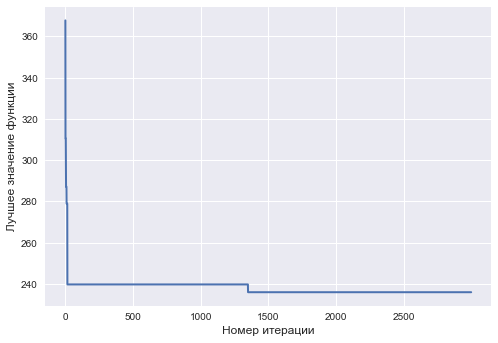

In [138]:
plt.style.use("seaborn")
plt.xlabel('Номер итерации', fontsize = 12)
plt.ylabel('Лучшее значение функции', fontsize = 12)
plt.plot(bestValueVector, linewidth=2)
plt.xticks(np.arange(0, iterAmount, step=500))